In [1]:
import pandas as pd

In [10]:
phonecases = pd.read_csv('../../../data/phonecase.csv')

In [11]:
import sklearn.tree

In [12]:
classifier = sklearn.tree.DecisionTreeClassifier(criterion='gini')

In [13]:
#goal is to use train_test_split function

In [14]:
import sklearn.cross_validation

In [18]:
X = phonecases[['Income','Age']]
y = phonecases[['Colour']]

In [20]:
split_stuff = sklearn.cross_validation.train_test_split(X, y)

In [21]:
type(split_stuff)

list

In [22]:
#first item in list is the training x data
split_stuff[0]

,Income,Age
12,150000,40
3,500,17
17,30000,65
11,80000,30
15,40000,62
4,10000,18
2,0,15
1,10,14
8,30000,23
13,60000,41


In [23]:
#this is the testing x data
split_stuff[1]

,Income,Age
14,100000,60
16,60000,63
6,0,21
0,0,12
9,40000,25


In [24]:
#this is the training y data
split_stuff[2]

,Colour
12,Red
3,Yellow
17,Pink
11,Pink
15,Yellow
4,Red
2,Red
1,Red
8,Yellow
13,Pink


In [25]:
#this is the test y data
split_stuff[3]

,Colour
14,Pink
16,Pink
6,Yellow
0,Red
9,Pink


In [26]:
X_train = split_stuff[0]
X_test = split_stuff[1]
y_train = split_stuff[2]
y_test = split_stuff[3]

#Could shorten it by doing this:
#(X_train, X_test, y_train, y_test) = split_stuff

In [27]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

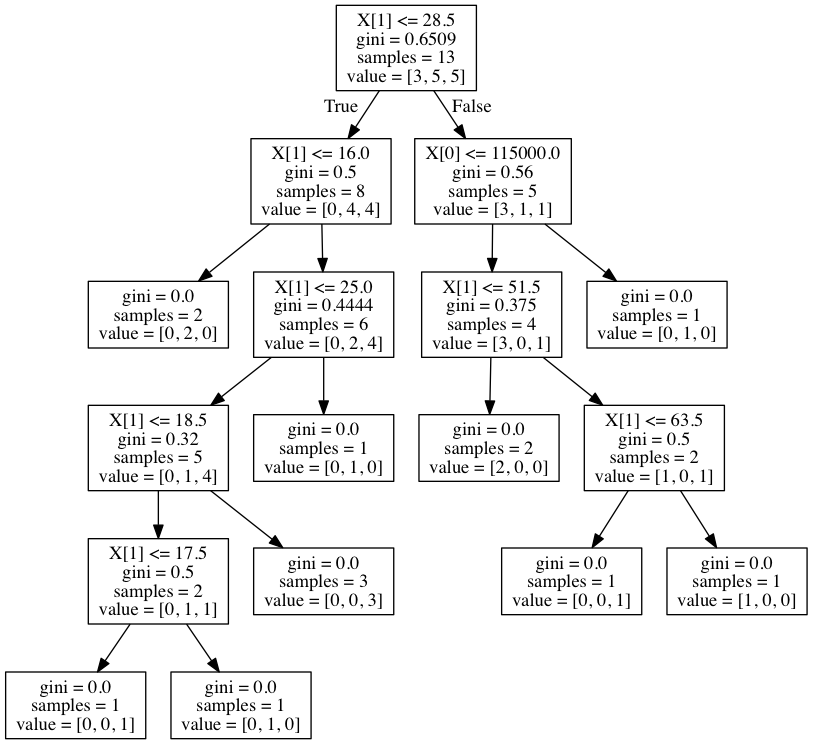

In [34]:
import StringIO
s = StringIO.StringIO()
sklearn.tree.export_graphviz(classifier, out_file=s)
import pydotplus
graph = pydotplus.graph_from_dot_data(s.getvalue())
import IPython.display
IPython.display.Image(graph.create_png())
#this tree doesn't seem like it will work well, it's overfitted. Let's try to get the metrics

In [36]:
y_predictions = classifier.predict(X_test)

In [37]:
import sklearn.metrics

In [38]:
sklearn.metrics.accuracy_score(y_test, y_predictions)

0.40000000000000002

In [39]:
#let's see what the DummyClassifier gets
import sklearn.dummy

In [52]:
y_test.describe()

,Colour
count,5
unique,3
top,Pink
freq,3


In [61]:
dummy_classifier = sklearn.dummy.DummyClassifier(strategy='constant', constant='Pink')

In [62]:
dummy_classifier.fit(X_train, y_train)

DummyClassifier(constant='Pink', random_state=None, strategy='constant')

In [63]:
dummy_predictions = dummy_classifier.predict(X_test)

In [64]:
sklearn.metrics.accuracy_score(y_test, dummy_predictions)
#dummy is doing better D: not good...

0.59999999999999998

In [ ]:
#K folds semi-interactive

In [65]:
phonecases

,Age,Income,Colour
0,12,0,Red
1,14,10,Red
2,15,0,Red
3,17,500,Yellow
4,18,10000,Red
5,19,30000,Yellow
6,21,0,Yellow
7,21,20000,Yellow
8,23,30000,Yellow
9,25,40000,Pink


In [67]:
training = phonecases.drop([2, 5, 7])

In [75]:
test = phonecases[(phonecases.index == 2) | (phonecases.index == 5) | (phonecases.index == 7)]

,Age,Income,Colour
2,15,0,Red
5,19,30000,Yellow
7,21,20000,Yellow


In [69]:
new_classifier = sklearn.tree.DecisionTreeClassifier(criterion='gini', max_depth=3)

In [82]:
X_train = training[['Age', 'Income']]

In [83]:
y_train = training[['Colour']]

In [84]:
X_test = test[['Age', 'Income']]

In [85]:
y_test = test[['Colour']]

In [86]:
new_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [91]:
new_pred = new_classifier.predict(X_test)
new_pred

array(['Red', 'Red', 'Red'], dtype=object)

In [90]:
sklearn.metrics.accuracy_score(y_test, new_pred)

0.33333333333333331

In [92]:
y_test

,Colour
2,Red
5,Yellow
7,Yellow


In [94]:
X_test

,Age,Income
2,15,0
5,19,30000
7,21,20000


In [112]:
#k-folds validation: split stuff lots of different ways many times
#y needs to be a series, not Dataframe
y = phonecases.Colour
sklearn.cross_validation.cross_val_score(classifier, X, y, cv=6, scoring='accuracy')

array([ 0.33333333,  0.33333333,  1.        ,  0.33333333,  0.33333333,
        0.33333333])

In [113]:
#get the mean for this
sklearn.cross_validation.cross_val_score(classifier, X, y, cv=6, scoring='accuracy').mean()

0.38888888888888884

In [114]:
#brute force testing for parameters!
import sklearn.grid_search

In [116]:
params = {'max_depth': range(1, 10),
        'criterion' : ['gini', 'entropy'],
        'max_features' : [1, 2]
        }

In [121]:
fresh_classifier = sklearn.tree.DecisionTreeClassifier()
brute_force = sklearn.grid_search.GridSearchCV(fresh_classifier, params, cv=6)

In [122]:
brute_force.fit(X, y)

GridSearchCV(cv=6, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 2], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [123]:
brute_force.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_features': 2}

In [124]:
brute_force.best_score_

0.55555555555555558

In [125]:
brute_force.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=2, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')